Importing Libraries

In [10]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Fixing random seed for reproducibility

In [11]:
numpy.random.seed(7)

Load dataset but keep only top 5000 words, others will be zero

In [12]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

17473536/17464789 [==============================] - 0s 0us/step


truncating and pading input sequences

In [13]:
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

creating the model

In [17]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, epochs=5, batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
391/391 [==============================] - 218s 554ms/step - loss: 0.5214 - accuracy: 0.7315
Epoch 2/5
391/391 [==============================] - 217s 554ms/step - loss: 0.3112 - accuracy: 0.8710
Epoch 3/5
391/391 [==============================] - 216s 553ms/step - loss: 0.2492 - accuracy: 0.9016
Epoch 4/5
391/391 [==============================] - 217s 555ms/

Predicting on test data

In [18]:
pred = model.predict(X_test)
print(pred)


[[0.03000125]
 [0.9935244 ]
 [0.8287724 ]
 ...
 [0.0361636 ]
 [0.22088951]
 [0.9382732 ]]


Final evaluation of the model

In [19]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 87.32%


In [2]:
import pandas as pd
#creating Accuarcy Table for all models
col_names = ["Model", "Accuracy_for_Train","Accuracy_for_Test"]
Accuracy_Table = pd.DataFrame(columns = col_names)

In [3]:
Accuracy_Table.loc[len(Accuracy_Table)]=["Naive_bayes",86.13,84.50]
Accuracy_Table.loc[len(Accuracy_Table)]=["LSTM",92.62,87.32]
Accuracy_Table.loc[len(Accuracy_Table)]=["TFDistilBertForSequenceClassification",82.66,80.32]
Accuracy_Table

,Model,Accuracy_for_Train,Accuracy_for_Test
0,Naive_bayes,86.13,84.50
1,LSTM,92.62,87.32
2,TFDistilBertForSequenceClassification,82.66,80.32


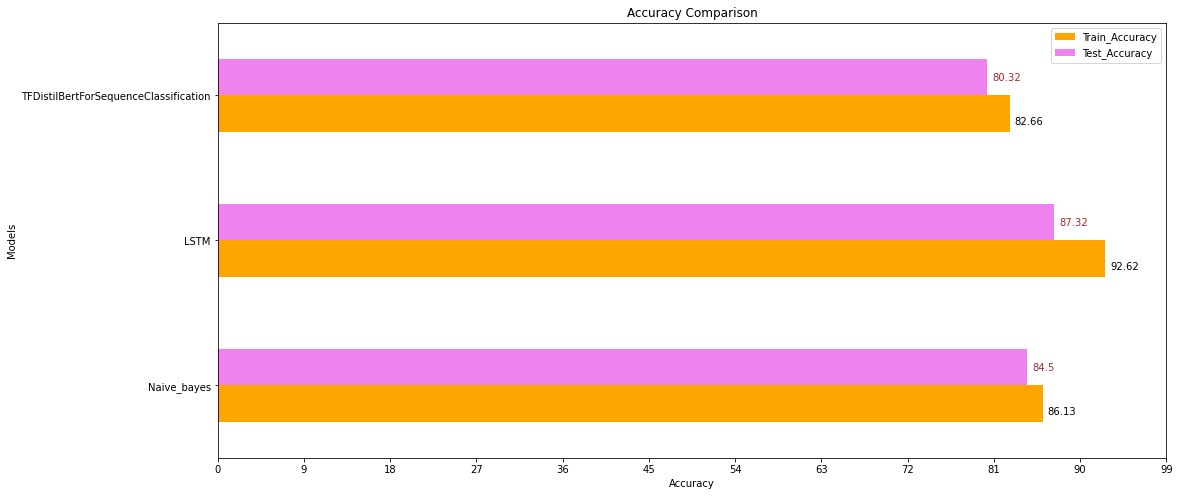

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Train_Accuracy = Accuracy_Table['Accuracy_for_Train']
Test_Accuracy = Accuracy_Table['Accuracy_for_Test']
Model = Accuracy_Table['Model']
   
data = {'Train_Accuracy': Train_Accuracy,
        'Test_Accuracy': Test_Accuracy,
        'Model':Model
       }

df = pd.DataFrame(data,columns=['Train_Accuracy','Test_Accuracy','Model'],index=[0,1,2])
df.set_index('Model',inplace=True)

df.plot.barh(figsize=(17,8),color=['orange','violet'])

for i, v in enumerate(Train_Accuracy):
    plt.text(v+0.5, i -0.2, str(v), color='black')
for i, v in enumerate(Test_Accuracy):
    plt.text(v+0.5, i +0.1, str(v), color='brown')

plt.title('Accuracy Comparison')
plt.ylabel('Models')
plt.xlabel('Accuracy')
plt.xticks(np.arange(0, 105, 9))

plt.show()


The accuracy of several models for the IMDB Large Movie Dataset is represented in the bar chart above. For the IMDB Large Movie dataset, Machine Learning Models such as Naive Bayes do not perform well. The following Bar plot shows that LSTM performs the best, with a training data accuracy of roughly 93 percent and a testing data accuracy of around 87.32 percent.
